In [2]:
# working dir
import os
import sys

cwd = os.getcwd()
root_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(root_dir)

print(root_dir)

c:\Users\david\Desktop\Main\03_Uni\WWI21DSA\02_Vorlesungen\06_Projektrealisierung\Projektrealisierung


In [3]:
# Imports and settings
import pandas as pd
import random

random.seed(42)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [4]:
import pandas as pd
from IPython.display import display, HTML

# Display Dataframe (with scrollbars)
def ddf(df, max_height=500, max_width=1500):
    """
    Display a pandas DataFrame with horizontal and vertical scrollbars in a Jupyter notebook.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    max_height (int): The maximum height of the scrollable area in pixels.
    max_width (int): The maximum width of the scrollable area in pixels.
    """
    style = f"""
    <style>
    .scrollable-dataframe {{
        max-height: {max_height}px;
        max-width: {max_width}px;
        overflow: auto;
        display: inline-block;
        position: relative;
    }}
    .scrollable-dataframe thead th {{
        position: sticky;
        top: 0;
        background-color: white;
        z-index: 1;
    }}
    </style>
    """
    html = style + df.to_html(classes='scrollable-dataframe')
    display(HTML(html))


In [5]:
# Load data
abcd_cwata = pd.read_csv("../../src/data/extracted/abcd_CalculateWeightAndTrimAction.csv")
abcd_cwata["airline"] = "abcd"
mnop_cwata = pd.read_csv("../../src/data/extracted/mnop_CalculateWeightAndTrimAction.csv")
mnop_cwata["airline"] = "mnop"
zyxw_cwata = pd.read_csv("../../src/data/extracted/zyxw_CalculateWeightAndTrimAction.csv")
zyxw_cwata["airline"] = "zyxw"

cwata = pd.concat([abcd_cwata, mnop_cwata, zyxw_cwata])

In [6]:
cwata = pd.concat([abcd_cwata, mnop_cwata, zyxw_cwata])

In [7]:
frq = cwata.groupby(["airline", "flight_id"])["id"].count().reset_index().sort_values("id", ascending=False)

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_histogram(df, dataset, color):
    """
    Plots a histogram of the values in the 'id' column of a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame with at least two columns, where the second column is named 'id'.

    Returns:
    None
    """
    if 'id' not in df.columns:
        raise ValueError("The DataFrame must have a column named 'id'.")

    plt.figure(figsize=(10, 6))
    num_bins = len(df['id'].unique())
    num_bins = 75
    plt.hist(df['id'], bins=num_bins, edgecolor='k', alpha=0.7, color=color)
    plt.title(f'CalculateWeightAndTrimAction Count per Flight for {dataset}')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.grid(axis='x', linestyle='--', linewidth=0.5)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.show()

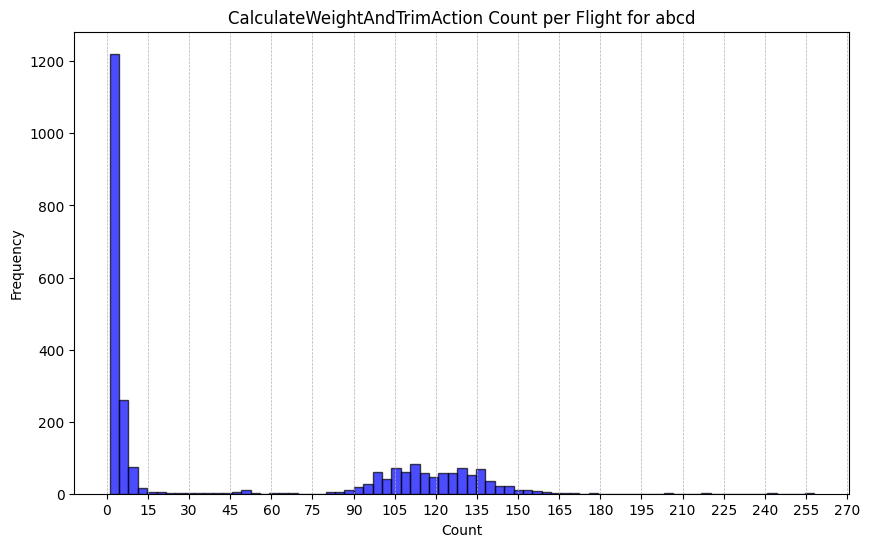

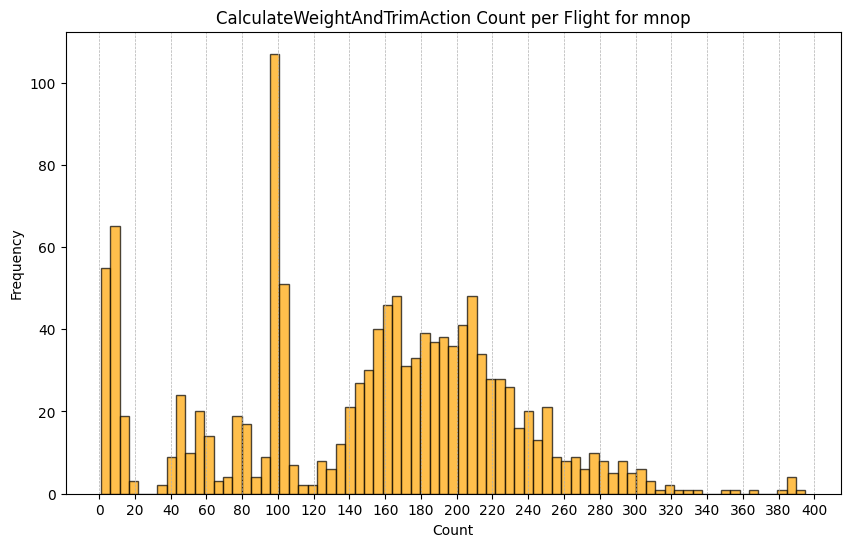

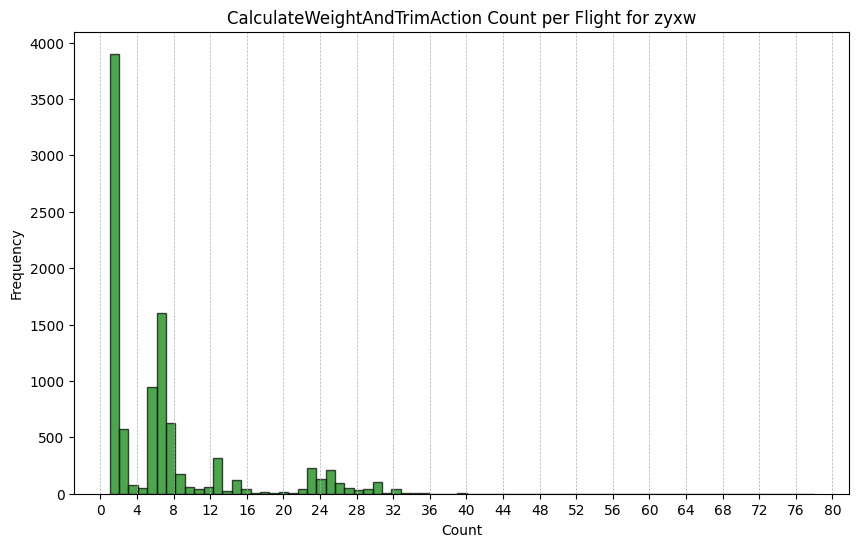

In [9]:
for airline_code, color in [("abcd", "blue"), ("mnop", "orange"), ("zyxw", "green")]:
    plot_histogram(frq[frq["airline"] == airline_code], airline_code, color)